# 主成分分析与数据降维(2019.8.6 Workshop)

- 时间8.6 14:30\-15:30，地点26楼【C语言】会议室
- 形式与时间分配：30分钟简述原理与应用，30分钟实践与问题讨论
- Keywords：数据降维，信息压缩，协方差矩阵，奇异值分解
- 所需环境：`Python3`, `Jupyter Notebook`, `sklearn`, `matplotlib`

### 讨论
- 什么是“数据的维度”？
- 有没有遇到过数据的维度过高的情况？
- 数据的维度之间是否存在信息冗余？
    - 例如：二手房的数据字段
- 如何消除或减少冗余的信息？

## PCA应用场景
- 降低数据集的维度
    - 简化数据分析的复杂度
    - 减少机器计算时间
- 压缩数据
    - 无损压缩与有损压缩
    - 在压缩的同时保留最重要的信息
- 发现未知的关键特征
    - 从原始的数字段中发现和提取新的特征(feature)，用于训练模型
- 探索性数据分析([Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis))
- 过滤数据中的噪音

### PCA的缺点和局限性
- 容易受到异常数据的影响
- 更加健壮的PCA模型：RandomizedPCA, sparsePCA 

## PCA的实现方法
- 方法一：协方差矩阵的特征分解
    1. 数据归一化
    2. 计算[协方差矩阵](https://en.wikipedia.org/wiki/Covariance_matrix)
    3. 对协方差矩阵进行特征分解
- 方法二：奇异值分解
    - 特征值 & 奇异值
    - 奇异向量 & 酉矩阵

### **Demo: 鸢尾花(Iris)数据集**
- 三种鸢尾花品种：杂色鸢尾(Versicolour), 山鸢尾(Setosa), 维吉尼亚鸢尾(Virginica)
- Kaggle比赛中的[Iris Dataset](https://www.kaggle.com/uciml/iris)
- [某选手使用决策树对Iris进行分类](https://diwashrestha.com/2017/09/18/machine-learning-on-iris/)

![Iris](https://diwashrestha.com/wp-content/uploads/2017/09/images.jpg)

In [1]:
# !pip install numpy pandas sklearn matplotlib opencv-python ipywidgets

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()

**鸢尾花分类名称**

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**鸢尾花特征**
- 萼片长度(sepal length)
- 萼片宽度(sepal width)
- 花瓣长度(petal length)
- 花瓣宽度(petal width)

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**二维空间对两个特征进行可视化**

In [22]:
X = iris.data
y = iris.target

@interact(
    feature1=widgets.Select(value=0, options=[i for i in range(4)]),
    feature2=widgets.Select(value=1, options=[i for i in range(4)]),
)
def visulize_features(feature1=0, feature2=1):
    
    plt.figure()
    plt.scatter(X[:, feature1], X[:, feature2], c=y, cmap='PiYG_r', edgecolor='k');
    plt.xlabel(iris['feature_names'][feature1]);
    plt.ylabel(iris['feature_names'][feature2]);
    plt.show()

interactive(children=(Select(description='feature1', options=(0, 1, 2, 3), value=0), Select(description='featu…

In [35]:
X_reduced = PCA(n_components=3, svd_solver='full').fit_transform(iris.data)
y = iris.target
@interact(
    elevation=widgets.IntText(value=-90, step=5),
    azimuth=widgets.IntText(value=90, step=5)
)
def visualize_pca_iris(elevation=-150, azimuth=110):
    
    fig = plt.figure(1, figsize=(10, 6))
    ax = Axes3D(fig, elev=elevation, azim=azimuth)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap='PiYG_r', edgecolor='k', s=40)
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.set_zlabel("3rd eigenvector")
    plt.show()

interactive(children=(IntText(value=-90, description='elevation', step=5), IntText(value=90, description='azim…

### Session1

- 尝试使用`numpy`中的奇异值分解`np.linalg.svd`方法重现Iris数据的PCA

In [34]:
# 修改这部分代码完成
# U, D, V = np.linalg.svd(X)


### Session2 : 对以下合成数据进行PCA

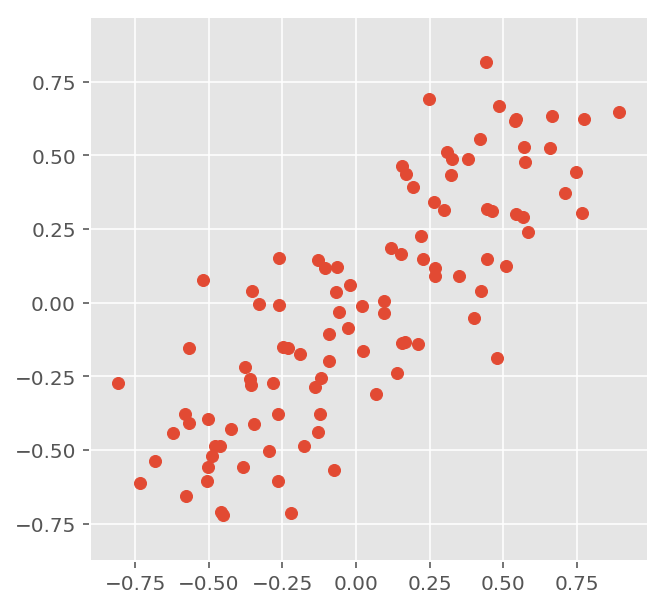

In [8]:
np.random.seed(46)
num_data = 100
SNR = 6 # 信噪比
noise2d = np.random.randn(num_data,2) * 1/SNR
signal_direction = 0.6
signal2d = signal_direction * np.linspace(-1, 1 ,num_data)
x = signal2d + noise2d[:,0]
y = signal2d + noise2d[:,1]
plt.figure(figsize=(5,5))
plt.scatter(x, y);
plt.axis('equal');